In previous notebooks we REPLACE NA values with 

1) MEAN

2)MEDIAN

3)OUTLIERS OR IN OTHER WORDS VALUES WHICH ARE PRESENT IN THE FAR END OF THE DISTRIBUTION

4) BINARY NO.

5) PICKING THE RANDOM VALUE FROM THE FEATURE

6) HERE PICKING THE RANDOM VALUE NOT FROM THE FEATURE --> WORKED WELL 

In [56]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)

In [3]:
cropped_data = titanic[['Age','Fare','Survived']]

In [4]:
pd.DataFrame(cropped_data.isna().sum())

,0
Age,177
Fare,0
Survived,0


In [5]:
def Imputer_na(df,col,values):
    df[col+'_RANDOM'] = df[col].fillna(values)

In [6]:
Imputer_na(cropped_data,'Age',100)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
cropped_data

,Age,Fare,Survived,Age_RANDOM
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0
...,...,...,...,...
886,27.0,13.0000,0,27.0
887,19.0,30.0000,1,19.0
888,NaN,23.4500,0,100.0
889,26.0,30.0000,1,26.0


In [58]:
X= cropped_data.drop(columns=['Survived'])
Y = cropped_data.Survived

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =42)

In [61]:
X_train

,Age,Fare,Age_RANDOM
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,100.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


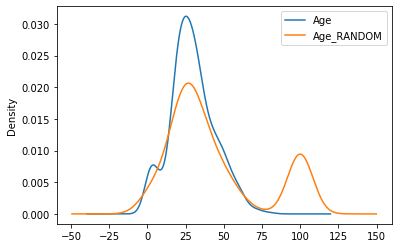

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde')
X_train['Age_RANDOM'].plot(kind='kde')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

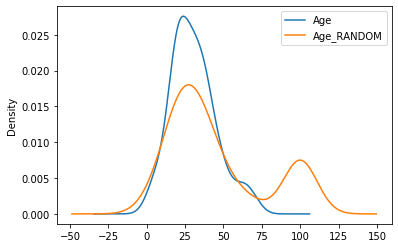

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_test['Age'].plot(kind='kde')
X_test['Age_RANDOM'].plot(kind='kde')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [26]:
Y_train.shape

(712,)

In [27]:
X_train.shape

(712, 2)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix , classification_report

RANDOM FOREST CLASSIFIER DOES NOT CARE ABOUT FEATURE SCALING

In [62]:
clf = RandomForestClassifier(max_depth=10,n_estimators=100)
clf.fit(X_train[['Fare','Age_RANDOM']],Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
prediction_test = clf.predict_proba(X_test[['Fare','Age_RANDOM']])[:,1]

In [67]:
prediction_train = clf.predict_proba(X_train[['Fare','Age_RANDOM']])[:,1]

In [68]:
print("ROC_AUC_SCORE on Test Set {}".format(roc_auc_score(Y_test,prediction_test)))

ROC_AUC_SCORE on Test Set 0.7497425997425997


In [69]:
print("ROC_AUC_SCORE on Train Set {}".format(roc_auc_score(Y_train,prediction_train)))

ROC_AUC_SCORE on Train Set 0.9744772757832459


LET'S COMPARE WITH LOGISTIC

In [85]:
from sklearn.linear_model import LogisticRegression

In [105]:
clf_log  = LogisticRegression(C=1.0)
clf_log.fit(X_train[['Fare','Age_RANDOM']],Y_train)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
prediction_test = clf_log.predict_proba(X_test[['Fare','Age_RANDOM']])[:,1]

In [107]:
prediction_train = clf_log.predict_proba(X_train[['Fare','Age_RANDOM']])[:,1]

In [108]:
print("ROC_AUC_SCORE on Test Set {}".format(roc_auc_score(Y_test,prediction_test)))
print("ROC_AUC_SCORE on Train Set {}".format(roc_auc_score(Y_train,prediction_train)))

ROC_AUC_SCORE on Test Set 0.7305662805662806
ROC_AUC_SCORE on Train Set 0.6788271480435659


I have seen on Kaggle community people use this approach mostly so this apporach can be work well 
In the END WE NEED TO CHECK WITH ALL METHOD WHICH WE DISCUSS AND SEE WHAT FIT'S BETTER